In [1]:
# data files
zip_csv = 'data/zipcodes.csv'
yelp_csv = 'data/yelp.csv'
violations_csv = 'data/violations.csv'
restaurants_csv = 'data/restaurants.csv'
inspections_csv = 'data/inspections.csv'

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
zips = pd.read_csv(zip_csv)
yelp = pd.read_csv(yelp_csv)
violations = pd.read_csv(violations_csv)
restaurants = pd.read_csv(restaurants_csv)
inspections = pd.read_csv(inspections_csv)

In [4]:
violations.head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


In [5]:
violations.category.value_counts()

Physical Facilities                            38994
Utensils and Equipment                         35803
Potentially Hazardous Food Time/Temperature    20052
Protection from Contamination                  18493
Prevention of Food Contamination               15796
Proper Use of Utensils                         14040
Preventing Contamination by Hands              11082
Food Temperature Control                        7856
Supervision                                     6450
Employee Health                                 5979
Chemical                                        5579
Food Identification                             2904
Good Hygienic Practices                         2503
Consumer Advisory                               2155
Approved Source                                 1261
Safe Food and Water                              464
Conformance with Approved Procedures             374
Highly Susceptible Populations                    17
Name: category, dtype: int64

In [6]:
violations.severity.value_counts()

Core                   112501
Priority Foundation     36115
Priority                32229
Name: severity, dtype: int64

In [7]:
violations.inspectedby.value_counts()

Lucy Schrum           25935
Andrea Anover         17605
Christopher Walker    11754
Jennifer Edwards      11622
Angela Myers          11367
Caroline Suggs        10632
Karla Crowder          9538
James Smith            9185
Naterra McQueen        9000
David Adcock           8742
Anne Bartoli           7915
Melissa Harrison       6782
Chris Askew            6319
Thomas Jumalon         5607
Laura McNeill          5130
Dimitri Parker         4737
Daryl Beasley          4721
Tim Bass               4159
Johanna Hill           4140
James Salter           3268
Christy Klaus          2948
Johanna Farmer         1786
Ashley Whittington     1511
Pamela Scott           1482
Lisa McCoy             1338
Jason Dunn             1279
Ginger Johnson          620
Jessica Andrews         499
Marion Wearing           59
Frances Breedlove        34
Jason Royal               8
System Activity           2
Name: inspectedby, dtype: int64

In [8]:
violations.describe()

,X.objectid,hsisid,questionno,pointvalue,count
count,189802.000000,1.898020e+05,189802.000000,189802.000000,0.0
mean,95130.206231,4.141120e+09,32.824791,0.340002,NaN
std,54874.307898,4.459234e+09,17.024364,0.579166,NaN
min,1.000000,4.092010e+09,1.000000,0.000000,NaN
25%,47551.250000,4.092014e+09,19.000000,0.000000,NaN
50%,95201.500000,4.092016e+09,38.000000,0.000000,NaN
75%,142651.750000,4.092017e+09,47.000000,1.000000,NaN
max,190102.000000,4.092010e+11,54.000000,4.000000,NaN


In [9]:
violations.pointvalue.value_counts()

0    134007
1     48846
2      5170
3      1769
4        10
Name: pointvalue, dtype: int64

In [10]:
violations[violations.pointvalue == 4].head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
57634,59991,4092010071,2013-03-05T00:00:00.000Z,Preventing Contamination by Hands,".2652,.2653,.2655,.2656",No,6,2-301.12,Core,Hands clean & properly washed,Lisa McCoy,2-301.12 (C) TO avoid recontaminating their ha...,4,Out,NaN,NaN,Poor Personal Hygiene,"Proper, Adequate Handwashing"
58414,61770,4092012304,2012-12-06T00:00:00.000Z,Preventing Contamination by Hands,".2652,.2653,.2655,.2656",Yes,6,2-301.14,Priority,Hands clean & properly washed,Lucy Schrum,P - 2-301.14 - Observed worker wash his hands ...,4,Out,CDI,NaN,Poor Personal Hygiene,"Proper, Adequate Handwashing"
58478,61835,4092013716,2013-02-21T00:00:00.000Z,Preventing Contamination by Hands,".2652,.2653,.2655,.2656",Yes,6,2-301.14,Priority,Hands clean & properly washed,James Salter,2-301.14 An employee was observed scrubbing a...,4,Out,CDI,NaN,Poor Personal Hygiene,"Proper, Adequate Handwashing"
67139,69475,4092012304,2012-12-06T00:00:00.000Z,Preventing Contamination by Hands,".2652,.2653,.2655,.2656",Yes,6,2-301.14,Priority,Hands clean & properly washed,Lucy Schrum,P - 2-301.14 - Observed worker wash his hands ...,4,Out,R,NaN,Poor Personal Hygiene,"Proper, Adequate Handwashing"
67549,69875,4092013070,2013-08-19T00:00:00.000Z,Preventing Contamination by Hands,".2652,.2653,.2655,.2656",Yes,6,2-301.14,Priority,Hands clean & properly washed,James Salter,2-301.14; Priority; Employee working the gril...,4,Out,CDI,NaN,Poor Personal Hygiene,"Proper, Adequate Handwashing"


In [11]:
violations[violations.pointvalue == 4].iloc[3].comments

'P - 2-301.14 - Observed worker wash his hands with gloves on. After gloves are contaminated, they shall be discarded before washing hands. CDI by discarding gloves and washing hands. '

In [12]:
violations.shortdesc.value_counts()

Equipment, food & non-food-contact surfaces approved, cleanable, properly designed, constructed & used    18602
Physical facilities installed, maintained & clean                                                         16650
Food-contact surfaces: cleaned & sanitized                                                                13187
Non-food contact surfaces clean                                                                           12466
Proper date marking & disposition                                                                          8182
Handwashing sinks supplied & accessible                                                                    7943
Meets ventilation & lighting  requirements; designated areas used                                          7127
PIC present, Demonstration - Certification by accredited program and perform duties                        6450
Utensils, equipment & linens: properly stored, dried, & handled                                         

In [13]:
violations.hsisid.value_counts()

4092015115    358
4092013966    346
4092010989    222
4092015939    219
4092015244    216
             ... 
4092017319      1
4092017317      1
4092140528      1
4092140560      1
4092016605      1
Name: hsisid, Length: 4270, dtype: int64

In [14]:
len(violations[violations.hsisid == 4092015939].inspectdate.unique())

12

In [15]:
restaurants.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [16]:
inspections.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [17]:
inspections[inspections.num_critical_previous.notnull()]

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
398,4092160070,2012-11-05T00:00:00Z,SUNRISE OF CARY FOODSERVICE,1206 W CHATHAM ST,NaN,cary,NC,27513,(919) 462-9147,2009-04-16T00:00:00Z,...,3,8.0,7.0,8.000000,7.000000,5.800000,9.600000,4.092021e+09,4.092300e+09,1
496,4092013936,2012-11-19T00:00:00Z,Apex High Culinary Arts,1501 Laura Duncan Rd,NaN,apex,NC,27502,(919) 387-2208,2003-11-10T00:00:00Z,...,7,11.0,4.0,11.000000,4.000000,5.200000,6.400000,4.092014e+09,4.092110e+09,1
630,4092110006,2012-12-03T00:00:00Z,Adams Elementary Cafeteria,805 CARY TOWNE BLVD,NaN,cary,NC,27511-4255,(919) 460-3438,1991-09-17T00:00:00Z,...,3,1.0,3.0,1.000000,3.000000,2.400000,3.400000,4.092015e+09,4.092016e+09,1
640,4092050026,2012-12-04T00:00:00Z,St Mary Magdalene School Cafeteria,625 Magdala PL,NaN,apex,NC,27502,(919) 657-4800 ext. 298,2004-08-13T00:00:00Z,...,0,5.0,7.0,5.000000,7.000000,5.400000,3.800000,4.092160e+09,4.092110e+09,1
652,4092016126,2012-12-05T00:00:00Z,PANERA BREAD #1650,1001 BEAVER CREEK COMMONS DR,NaN,apex,NC,27502,(919) 589-0026,2012-03-27T00:00:00Z,...,9,3.0,6.0,3.000000,6.000000,6.000000,4.600000,4.092015e+09,4.092016e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,5959-1108 Triangle Town Blv,NaN,raleigh,NC,27616,(919) 792-2499,2002-08-19T00:00:00Z,...,13,1.0,4.0,1.000000,4.777778,4.692525,9.863838,4.092022e+09,4.092017e+09,1
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,1000 Olde Weatherstone Way,NaN,cary,NC,27513,(919) 380-6985,1995-09-05T00:00:00Z,...,3,2.0,5.0,0.750000,3.250000,5.853333,5.972381,4.092013e+09,4.092016e+09,1
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,11555 GREEN LEVEL CHURCH RD,NaN,cary,NC,27519,NaN,2009-11-13T00:00:00Z,...,4,0.0,2.0,0.875000,1.750000,2.466667,3.000000,4.092017e+09,4.092015e+09,1
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,7971 FAYETTEVILLE RD,NaN,raleigh,NC,27603-5631,(919) 772-0317,2000-07-01T00:00:00Z,...,2,0.0,3.0,1.111111,2.000000,3.737302,4.606349,4.092016e+09,4.092015e+09,1


In [18]:
# violations[violations.hsisid == 4092013936].inspectdate.value_counts()

violations[violations.hsisid == 4092014046].inspectdate.value_counts()

2012-09-21T00:00:00.000Z    11
2013-06-18T00:00:00.000Z     9
2013-02-21T00:00:00.000Z     8
2013-12-04T00:00:00.000Z     7
2016-02-02T00:00:00.000Z     6
2015-09-16T00:00:00.000Z     5
2014-04-24T00:00:00.000Z     4
2015-04-15T00:00:00.000Z     3
2016-07-19T00:00:00.000Z     3
2014-10-30T00:00:00.000Z     3
Name: inspectdate, dtype: int64

In [19]:
print(len(violations.hsisid.unique()))
print(len(restaurants.hsisid.unique()))

4270
3324


In [20]:
restaurants[restaurants.hsisid.isin([4092013936])]

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
1611,612,4092013936,Apex High Culinary Arts,1501 Laura Duncan Rd,NaN,APEX,NC,27502,(919) 387-2208,2003-11-10T00:00:00.000Z,Restaurant,-78.838408,35.7458,M


In [21]:
df = pd.DataFrame(inspections.date.unique(), columns=['date'])

def averageInspectionsPerDate(date_string):
    return inspections[inspections.date == date_string].num_non_critical.mean()

df['avg_violations'] = df.date.apply(averageInspectionsPerDate)
df['datetime'] = df.date.apply(pd.to_datetime)

df = df.sort_values('date', ascending=True)

df.head()

,date,avg_violations,datetime
0,2012-09-21T00:00:00Z,6.000000,2012-09-21 00:00:00+00:00
1,2012-09-24T00:00:00Z,7.500000,2012-09-24 00:00:00+00:00
2,2012-09-25T00:00:00Z,5.800000,2012-09-25 00:00:00+00:00
3,2012-09-26T00:00:00Z,8.166667,2012-09-26 00:00:00+00:00
4,2012-09-27T00:00:00Z,6.642857,2012-09-27 00:00:00+00:00


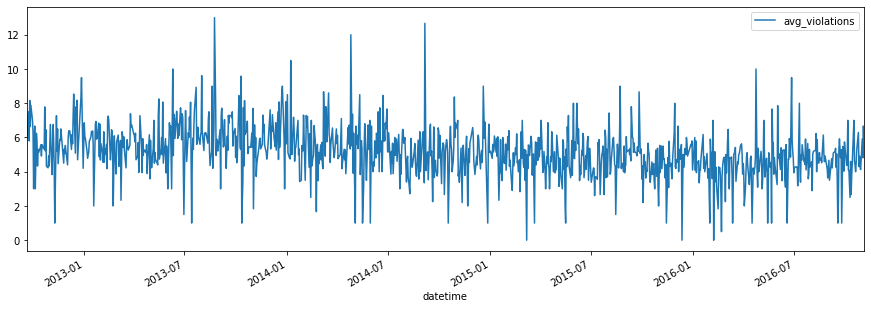

In [22]:
plt.rcParams['figure.figsize'] = (15, 5)
df.plot(x="datetime", y=["avg_violations"])
plt.show()

In [23]:
yelp[yelp.name.str.contains('panera', na=False)]
# yelp.head()

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
202,panera-bread-cary-2,panera bread,False,3.0,47,2234 Walnut St,27511,35.755495,-78.742511,$,...,False,False,False,False,False,True,False,False,False,False
399,panera-bread-durham-5,panera bread,False,2.5,37,737 9th St,27705,36.009634,-78.922364,$,...,False,False,False,False,False,True,False,False,False,False
415,panera-bread-raleigh-4,panera bread,False,3.0,56,7840 Alexander Promenade Pl,27617,35.913860,-78.779691,$,...,False,False,False,False,False,True,False,False,False,False
550,panera-bread-raleigh-8,panera bread,False,2.5,31,6201 Glenwood Ave,27612,35.855910,-78.703870,$,...,False,False,False,False,False,True,False,False,False,False
551,panera-bread-garner,panera bread,False,2.5,9,15 Cabela Dr,27529,35.697569,-78.582798,$$,...,False,False,False,False,False,True,False,False,False,False
556,panera-bread-cary-4,panera bread,False,3.5,16,1004 Parkside Main St,27519,35.846114,-78.886370,$$,...,False,False,False,False,False,True,False,False,False,False
1218,panera-bread-cary,panera bread,False,3.0,32,1065 Darrington Dr,27513,35.799173,-78.816027,$$,...,False,False,False,False,False,True,False,False,False,False
1416,panera-bread-durham-3,panera bread,False,3.0,32,6702 Fayetteville Rd,27713,35.903186,-78.941394,$,...,False,False,False,False,False,True,False,False,False,False
1769,panera-bread-apex,panera bread,False,3.0,37,1001 Beaver Creek Commons Dr,27502,35.744470,-78.872567,$$,...,False,False,False,False,False,True,False,False,False,False
2266,panera-bread-raleigh-2,panera bread,False,3.5,45,4421 Six Forks Rd,27609,35.840161,-78.643305,$,...,False,False,False,False,False,True,False,False,False,False


In [24]:
# yelp.address1 = yelp.address1.str.lower()
restaurants.address1 = restaurants.address1.str.lower()
restaurants.address2 = restaurants.address2.str.lower()
# yelp.name = yelp.name.str.lower()
restaurants.name = restaurants.name.str.lower()
restaurants.head()
# inspections['name_address'] = inspections.name + ' ' + inspections.address1 + ' ' + inspections.address2.fillna('')
# inspections.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,spring cafe 2,2900-104 spring forest rd,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,carolina classic hot dogs #2 (wcid #549),309 holloman st,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,taco bell #22798,2207 s main st,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,the remedy diner,137 e hargett st,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,zebulon house (kitchen),551 pony rd,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [25]:
# yelp[yelp.address1 == '1001 BEAVER CREEK COMMONS DR'.lower()]
yelp.iloc[2000]

id                        subway-cary-2
name                             subway
is_closed                         False
rating                              2.5
review_count                          9
address1            1813 N Harrison Ave
zip_code                          27513
latitude                        35.8303
longitude                      -78.7675
price                                 $
phone                       19196781191
hotdogs                            True
sandwiches                         True
pizza                             False
tradamerican                      False
burgers                           False
mexican                           False
grocery                           False
breakfast_brunch                  False
coffee                            False
chinese                           False
italian                           False
newamerican                       False
chicken_wings                     False
delis                             False


In [26]:

# # compare = yelp.merge(inspections, on='address1')
# # compare
# restaurants
# test = restaurants[restaurants[restaurants.x == yelp.iloc[0].latitude].y == yelp.iloc[0].longitude]

# y = yelp.iloc[3].latitude
# x = yelp.iloc[3].longitude
# acc = 0.001
# test = restaurants[(restaurants.y < (y + acc)) & (restaurants.y > (y-acc))]
# test = restaurants[(restaurants.x < (x + acc)) & (restaurants.x > (x-acc))]

add_num = yelp.iloc[2000].address1.split()[0]
test = restaurants[restaurants.address1.str.contains(add_num, na=False)]

test.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
1372,373,4092011518,lilly's pizza,1813 glenwood ave,NaN,RALEIGH,NC,27608-2323,(919) 833-0226,1994-07-22T00:00:00.000Z,Restaurant,-78.646527,35.804848,M
2696,2373,4092015114,subway #3262,1813 n harrison ave,NaN,CARY,NC,27513,(919) 678-1191,2008-04-23T00:00:00.000Z,Restaurant,-78.768379,35.829806,M


In [27]:
def getRestaurantsStateId(name, address1):
    f = restaurants[restaurants.name.str.contains(name.lower())]
    f = f[f.address1.str.contains(str(address1).lower())]

    if len(f) == 1:
        return f.iloc[0].hsisid
    elif len(f) > 1:
        return 'multiple'
    else:
        return 'no match'

test = yelp.apply(lambda x: getRestaurantsStateId(x['name'], x['address1']), axis = 1)
test[test != 'no match']

79      4092017219
95      4092016306
127     4092014354
128     4092021291
134     4092015786
           ...    
3632    4092010851
3636    4092017322
3640    4092017142
3659    4092013561
3673    4092016674
Length: 702, dtype: object

In [28]:
len(restaurants)

3324

In [29]:
len(yelp)

3688

In [30]:
# Try matching long lat again but with proximity
from scipy.spatial.distance import cdist

In [36]:
yelp['point'] = [(x, y) for x, y in zip(yelp.longitude, yelp.latitude)]
restaurants['point'] = [(x,y) for x, y in zip(restaurants.x, restaurants.y)]

def closest_place_hsisid(point):
    r = restaurants.iloc[cdist([point], list(restaurants.point)).argmin()]
    print(r)
    return r['name']
#     return rest_df[cdist([point], list(rest_df.point)).argmin()].hsisid

# yelp['closest'] = [closest_place(x, restaurants) for x in yelp.point]
# yelp.head()
clip = yelp[0:5].copy()
clip['match'] = clip.point.apply(closest_place_hsisid)
# for index, row in clip.iterrows():
#     print(row.name, )
clip

X.objectid                                         1154
hsisid                                       4092016735
name                  starbucks terminal i pre-security
address1                       1600 john brantley blvd.
address2                                            NaN
city                                        Morrisville
state                                                NC
postalcode                                        27560
phonenumber                                         NaN
restaurantopendate             2014-08-12T00:00:00.000Z
facilitytype                                 Restaurant
x                                              -78.7894
y                                               35.8697
geocodestatus                                         M
point                           (-78.789423, 35.869706)
Name: 153, dtype: object
X.objectid                                         1348
hsisid                                       4092021749
name                  w

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi,point,match
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,False,False,False,True,False,False,False,"(-78.79089570000001, 35.873808399999994)",starbucks terminal i pre-security
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,"(-78.78592990000001, 35.80284)",walmart neighborhood market #2414
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,False,False,False,False,False,False,False,False,"(-78.67879111, 35.83968059)",thai bistro
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,False,False,False,True,False,False,False,False,"(-77.96416043, 35.74317042)",cattails restaurant
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,"(-77.99942779999999, 35.762935600000006)",cattails restaurant


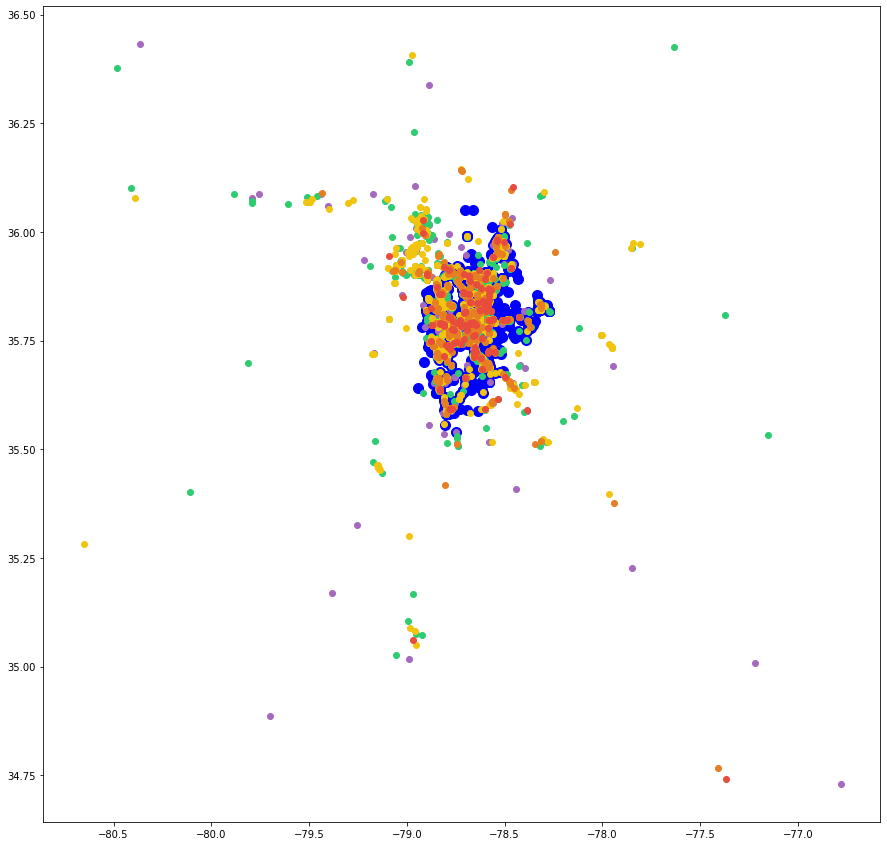

In [53]:
r_with_coord = restaurants[restaurants.x != 0]
y_5_star = yelp[yelp.rating == 5.0]
y_4_star = yelp[(yelp.rating >= 4.0) & (yelp.rating < 5.0)]
y_3_star = yelp[(yelp.rating >= 3.0) & (yelp.rating < 4.0)]
y_2_star = yelp[(yelp.rating >= 2.0) & (yelp.rating < 3.0)]
y_1_star = yelp[yelp.rating < 2.0]

plt.rcParams['figure.figsize'] = (15, 15)
plt.scatter(r_with_coord.x, r_with_coord.y , s=100, c='blue')
# plt.hold
plt.scatter(y_5_star.longitude, y_5_star.latitude, c='#a569bd')
plt.scatter(y_4_star.longitude, y_4_star.latitude, c='#2ecc71')
plt.scatter(y_3_star.longitude, y_3_star.latitude, c='#f1c40f')
plt.scatter(y_2_star.longitude, y_2_star.latitude, c='#e67e22')
plt.scatter(y_1_star.longitude, y_1_star.latitude, c='#e74c3c')
plt.show()

In [64]:
# !pip install geopandas
# !pip install descartes
import geopandas as gpd

In [65]:
zip_shape_file = 'data/Zip_Codes.shp'
zip_geo = gpd.read_file(zip_shape_file)

In [66]:
zip_geo.head()

,OBJECTID,ZIPNAME,ZIPNUM,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry
0,4731,RALEIGH,27601.0,RALEIGH 27601,RALEIGH,5.075530e+07,43034.538745,None,"POLYGON ((2110911.905 734054.272, 2110909.498 ..."
1,4732,DURHAM,27713.0,DURHAM 27713,DURHAM,9.440600e+06,22633.644539,None,"POLYGON ((2030499.967 769285.446, 2030048.607 ..."
2,4733,RALEIGH,27604.0,RALEIGH 27604,RALEIGH,5.678501e+08,201307.097948,None,"POLYGON ((2131220.755 746196.862, 2131224.716 ..."
3,4734,WAKE FOREST,27587.0,WAKE FOREST 27587,WAKE FOREST,2.682918e+09,561034.849697,None,"POLYGON ((2095200.449 814685.490, 2095255.380 ..."
4,4735,DURHAM,27703.0,DURHAM 27703,DURHAM,5.768992e+06,22448.009933,None,"POLYGON ((2060202.231 791990.316, 2060300.338 ..."


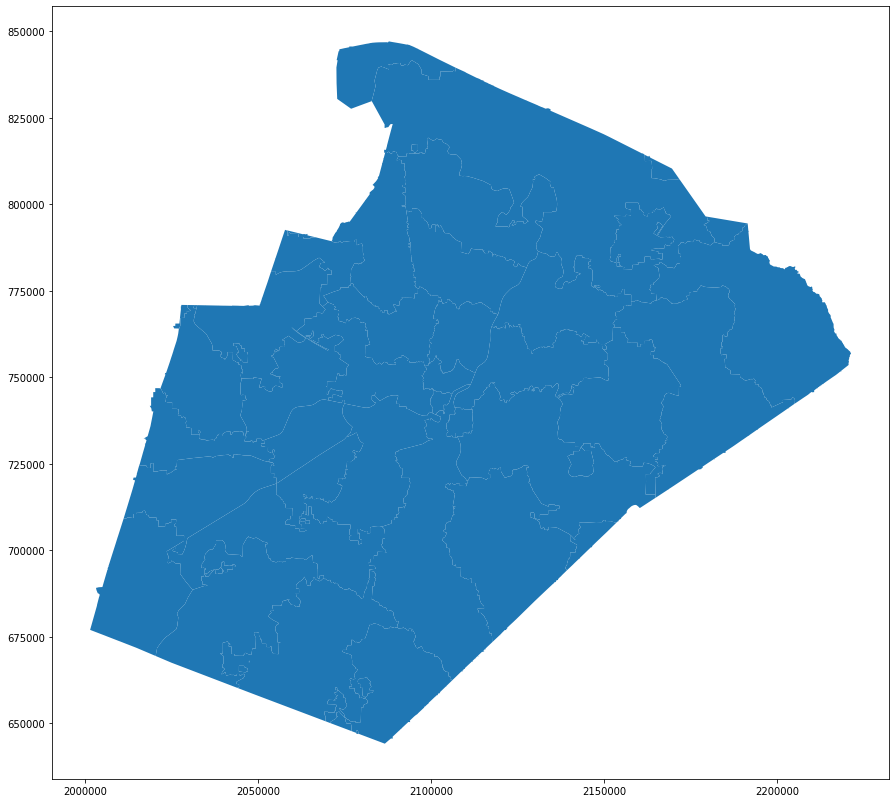

In [67]:
zip_geo.plot()
plt.show()

In [69]:
restaurants['zipcode'] = restaurants['postalcode'].str[:5]
restaurants.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus,point,zipcode
0,1001,4092017230,spring cafe 2,2900-104 spring forest rd,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M,"(-78.591634, 35.855487)",27616
1,1002,4092040338,carolina classic hot dogs #2 (wcid #549),309 holloman st,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M,"(-78.85534799999999, 35.730219)",27502
2,1003,4092014444,taco bell #22798,2207 s main st,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M,"(-78.53614499999999, 35.946695)",27587
3,1004,4092015333,the remedy diner,137 e hargett st,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M,"(-78.636895, 35.777999)",27601
4,1005,4092160069,zebulon house (kitchen),551 pony rd,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M,"(-78.332138, 35.816779)",27597


In [70]:
restaurants.zipcode.unique()

array(['27616', '27502', '27587', '27601', '27597', '27610', '27617',
       '27513', '27591', '27612', '27526', '27606', '27603', '27609',
       '27520', '27545', '27613', '27604', '27529', '27614', '27511',
       '27607', '27540', '27615', '27608', '27605', '27602', '27539',
       '27560', '27512', '27518', '27523', '27519', '27695', '28277',
       '27571', '27592', '27652', '27709', '27623', '27579', '27501',
       '27595', '27573', '27619', '27618', '27562', '27628', '27596',
       '27522', '27263', '27514', '28587', '28145', '27624', '27650'],
      dtype=object)

In [95]:
z1 = restaurants.zipcode.astype(int)
z2 = zip_geo[zip_geo.ZIPNUM.notnull()].ZIPNUM.astype(int)
# z1[~z1.isin(z2)].value_counts()
z3 = zips.zip.astype(int)
z3[~z3.isin(z2)].value_counts() # return no unmatched zipcodes (thats good!)

Series([], Name: zip, dtype: int64)

In [91]:
zips

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9
5,27519,137193,121815,45778,3.2,2.3,2.3,35.2
6,27520,67939,58455,25628,5.0,7.8,2.4,23.5
7,27522,66250,59221,25513,6.0,7.0,4.2,31.4
8,27523,89184,68342,36976,3.1,3.1,1.8,22.4
9,27526,74666,66025,28074,8.4,8.3,3.9,22.5


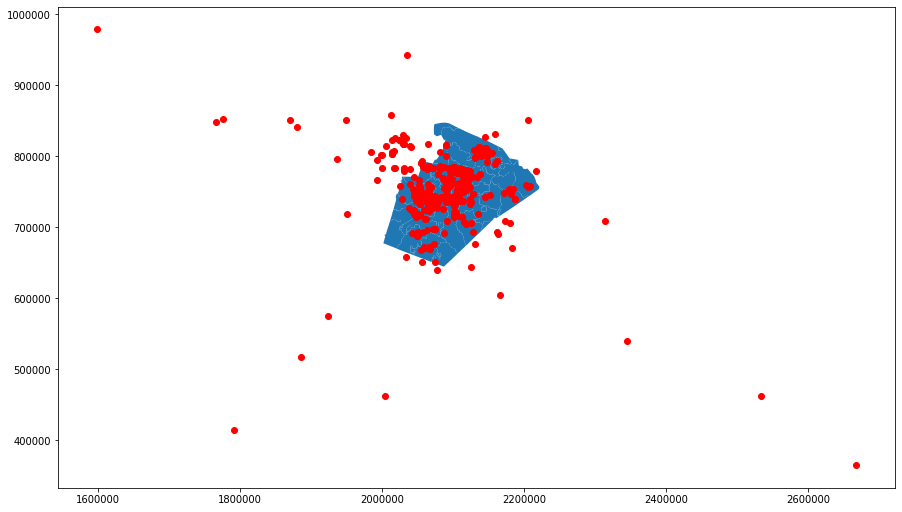

In [119]:
# metadata and coordinate system
# zip_geo.crs
y_5_star_gdf = gpd.GeoDataFrame(crs='EPSG:4326', geometry = gpd.points_from_xy(y_5_star.longitude,y_5_star.latitude))
y_5_star_gdf = y_5_star_gdf.to_crs(crs='epsg:2264')
# y_5_star_gdf.head()

ax = zip_geo.plot()
y_5_star_gdf.plot(ax=ax, color='red')
# y_5_star_gdf.plot( color='red')
# plt.scatter(r_with_coord.x, r_with_coord.y , s=100, c='blue')
# # plt.hold
# plt.scatter(y_5_star.longitude, y_5_star.latitude, c='#a569bd')
# plt.scatter(y_4_star.longitude, y_4_star.latitude, c='#2ecc71')
# plt.scatter(y_3_star.longitude, y_3_star.latitude, c='#f1c40f')
# plt.scatter(y_2_star.longitude, y_2_star.latitude, c='#e67e22')
# plt.scatter(y_1_star.longitude, y_1_star.latitude, c='#e74c3c')
plt.show()